# Exploratory Data Analysis

## Descriptive Statistics 
### Aim 
- Obtain basic statistics for textual lengths (like headline length).
- Count the number of articles per publisher to identify which publishers are most active.
- Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.
# 
### Technical Appraoch 
- use modular implementation as much as possible 
- cleanup code 
- calculate basic Technical indicators 
- visualize Data



In [3]:
# Import Dataset and useful libraries 
import os 
import pandas as pd 
os.chdir('../scripts/')
import utils as util


data_path = "../../data/week1/raw_analyst_ratings.csv"
df = util.read_csv_file(data_path)

In [6]:
df = df.get("data")
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


### Obtain basic statistics for textual lengths (like headline length).

In [32]:
# Calculate the length of each headline
df['headline_length'] = df['headline'].apply(len)

# Obtain basic statistics for headline lengths and also change it to integer to make more sense 
headline_length_stats = df['headline_length'].describe().apply(lambda x: int(x) if not x.is_integer() else x)

# Display the statistics
headline_length_stats

count    1407328.0
mean          73.0
std           40.0
min            3.0
25%           47.0
50%           64.0
75%           87.0
max          512.0
Name: headline_length, dtype: float64

### Count the number of articles per publisher to identify which publishers are most active.

In [33]:
# Count the number of articles per publisher
articles_per_publisher = df['publisher'].value_counts()

# Display top 20 articles per publisher  
articles_per_publisher[:20] 


Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: publisher, dtype: int64

### Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.

In [8]:
# Convert the 'date' column to datetime format with UTC conversion to handle tz-aware values
df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)

# Drop rows with invalid date values
df = df.dropna(subset=['date'])

# Convert to local time zone if needed (e.g., 'America/New_York')
df['date'] = df['date'].dt.tz_convert('America/New_York')

# Extract the date part only (without time)
df['date_only'] = df['date'].dt.date

# Extract the day of the week
df['day_of_week'] = df['date'].dt.day_name()

# Count the number of articles per day
articles_per_day = df['date_only'].value_counts().sort_index()

# Count the number of articles per day of the week
articles_per_day_of_week = df['day_of_week'].value_counts().sort_index()






In [39]:
# Display the number of articles per day
articles_per_day

2009-02-13      1
2009-04-26      2
2009-04-28      1
2009-05-21      1
2009-05-26      6
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: date_only, Length: 3976, dtype: int64

In [40]:
# Display the number of articles per day of the week
articles_per_day_of_week

Friday        16854
Monday       295793
Saturday      16344
Sunday       255278
Thursday     221207
Tuesday      300060
Wednesday    301792
Name: day_of_week, dtype: int64

### Text Analysis(Sentiment analysis & Topic Modeling)

##### Perform sentiment analysis on headlines to gauge the sentiment (positive, negative, neutral) associated with the news.

In [ ]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(headline):
    analysis = TextBlob(headline)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis on headlines
df['sentiment'] = df['headline'].apply(get_sentiment)

# Display the first few rows to check the sentiment column
df[['headline', 'sentiment']].head()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Function to display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Extract keywords/phrases using CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['headline'])

# Apply Latent Dirichlet Allocation (LDA) to extract topics
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# Display the topics
no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)


## Time Series Analysis

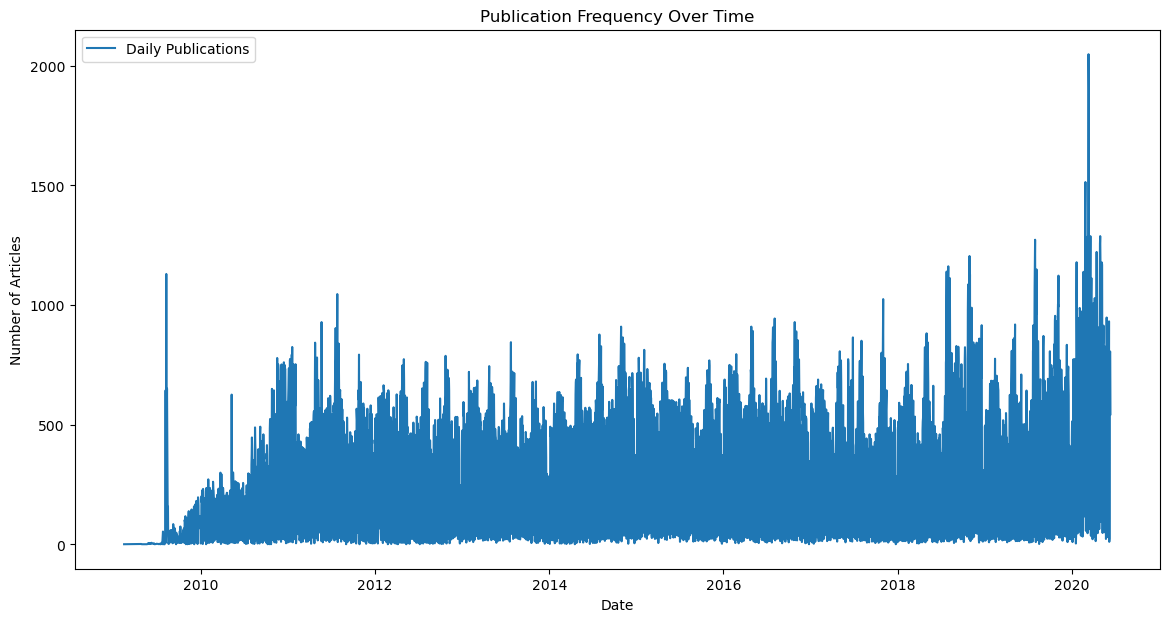

Dates with spikes in article publications:
date_only
2009-08-09    1130
2011-05-22     929
2011-07-27    1046
2014-10-29     910
2016-04-27     910
              ... 
2020-05-07    1168
2020-05-11     913
2020-05-13     914
2020-05-26     948
2020-06-05     932
Length: 92, dtype: int64


In [9]:
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the date only (without time) and create a new column 'date_only'
df['date_only'] = df['date'].dt.date

# Group by 'date_only' and count the number of articles published each day
daily_publication_counts = df.groupby('date_only').size()

# Plot the publication frequency over time
plt.figure(figsize=(14, 7))
plt.plot(daily_publication_counts.index, daily_publication_counts.values, label='Daily Publications')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Publication Frequency Over Time')
plt.legend()
plt.show()

# Identify spikes in article publications
# Define a threshold for identifying spikes (e.g., mean + 2*std)
threshold = daily_publication_counts.mean() + 2 * daily_publication_counts.std()

# Find dates where the publication count exceeds the threshold
spike_dates = daily_publication_counts[daily_publication_counts > threshold]

# Print the dates with spikes and their corresponding publication counts
print("Dates with spikes in article publications:")
print(spike_dates)


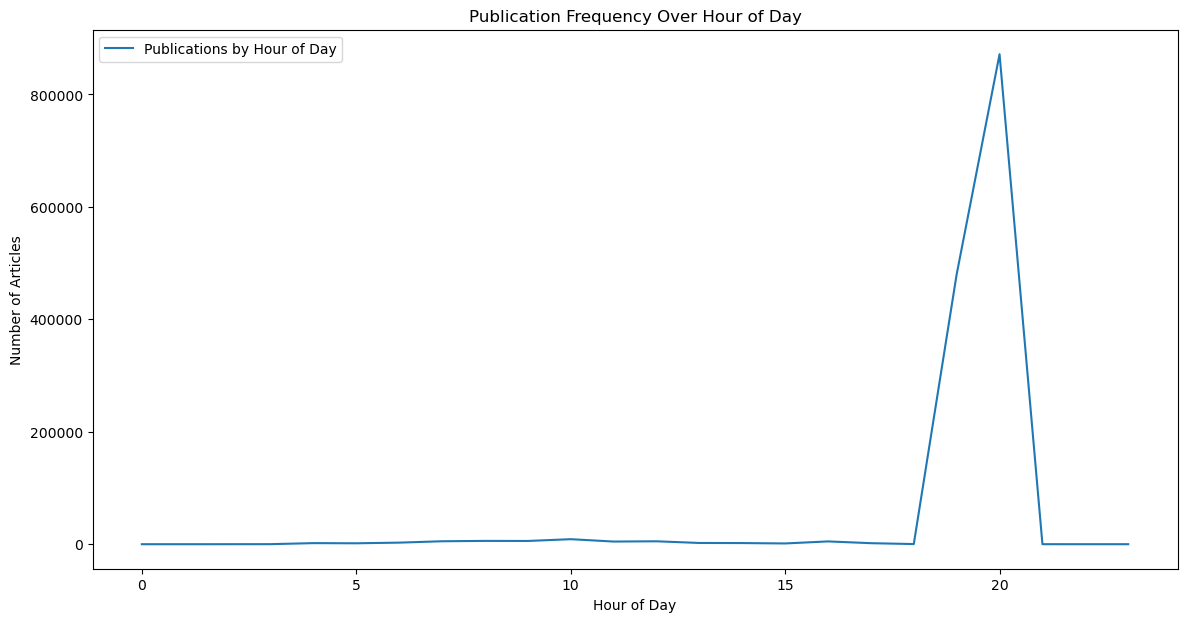

Hours with the highest publication counts:
time_only
19    480117
20    871519
dtype: int64


In [11]:
# Analyze the publishing times to find the most common times for news releases

# Extract the time from the 'date' column and create a new column 'time_only'
df['time_only'] = df['date'].dt.hour

# Group by 'time_only' and count the number of articles published at each hour
time_publication_counts = df.groupby('time_only').size()

# Plot the publication frequency over time of day
plt.figure(figsize=(14, 7))
plt.plot(time_publication_counts.index, time_publication_counts.values, label='Publications by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.title('Publication Frequency Over Hour of Day')
plt.legend()
plt.show()

# Identify the most common publishing times
# Define a threshold for identifying common times (e.g., mean + 2*std)
time_threshold = time_publication_counts.mean() + 2 * time_publication_counts.std()

# Find hours where the publication count exceeds the threshold
common_times = time_publication_counts[time_publication_counts > time_threshold]

# Print the hours with the highest publication counts and their corresponding counts
print("Hours with the highest publication counts:")
print(common_times)


# Publisher Analysis
### Analyze the top publishers and the type of news they report

In [12]:
# Get the top 10 publishers by article count
top_publishers = df['publisher'].value_counts().head(10)

# Print the top publishers and their article counts
print("Top 10 publishers by article count:")
print(top_publishers)

Top 10 publishers by article count:
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: publisher, dtype: int64


- Analyze the type of news reported by these top publishers
- For simplicity, let's assume the 'headline' column gives us an idea of the type of news

Mean headline length for the top 10 publishers:
Paul Quintaro         84.347839
Lisa Levin            47.502998
Benzinga Newsdesk    114.650508
Charles Gross         80.999328
Monica Gerson         51.002950
Eddie Staley          78.382296
Hal Lindon            87.955064
ETF Professor         44.089438
Juan Lopez            75.108200
Benzinga Staff        62.709789
Name: headline_length, dtype: float64


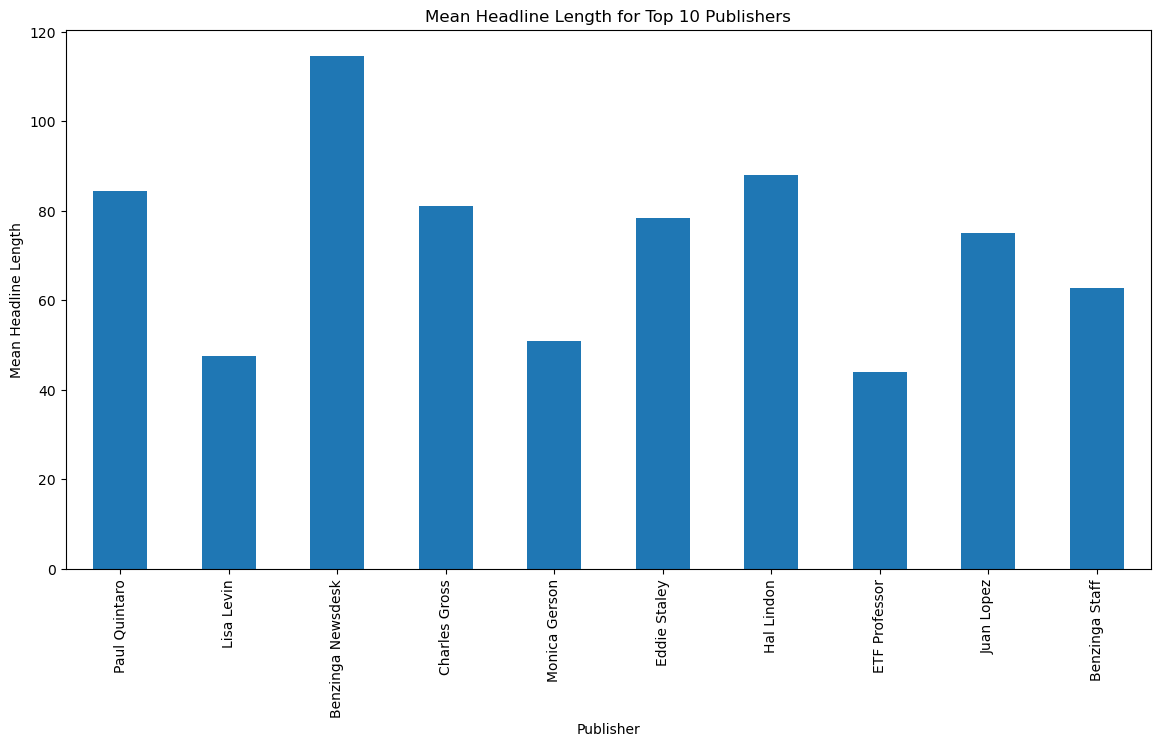

In [14]:
# Create a new column 'headline_length' to analyze the length of headlines
df['headline_length'] = df['headline'].apply(len)

# Group by 'publisher' and calculate the mean headline length for each publisher
publisher_headline_length = df.groupby('publisher')['headline_length'].mean()

# Filter the results to include only the top 10 publishers
top_publishers_headline_length = publisher_headline_length[top_publishers.index]

# Print the mean headline length for the top 10 publishers
print("Mean headline length for the top 10 publishers:")
print(top_publishers_headline_length)

# Plot the mean headline length for the top 10 publishers
plt.figure(figsize=(14, 7))
top_publishers_headline_length.plot(kind='bar')
plt.xlabel('Publisher')
plt.ylabel('Mean Headline Length')
plt.title('Mean Headline Length for Top 10 Publishers')
plt.show()


#### If email addresses are used as publisher names, identify unique domains to see if certain organizations contribute more frequently.

Unique domains and their counts:
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Mark Davis                1
janaviktoria              1
Kiana Danial              1
giovannimola              1
Jeremie Capron            1
Name: publisher_domain, Length: 1024, dtype: int64


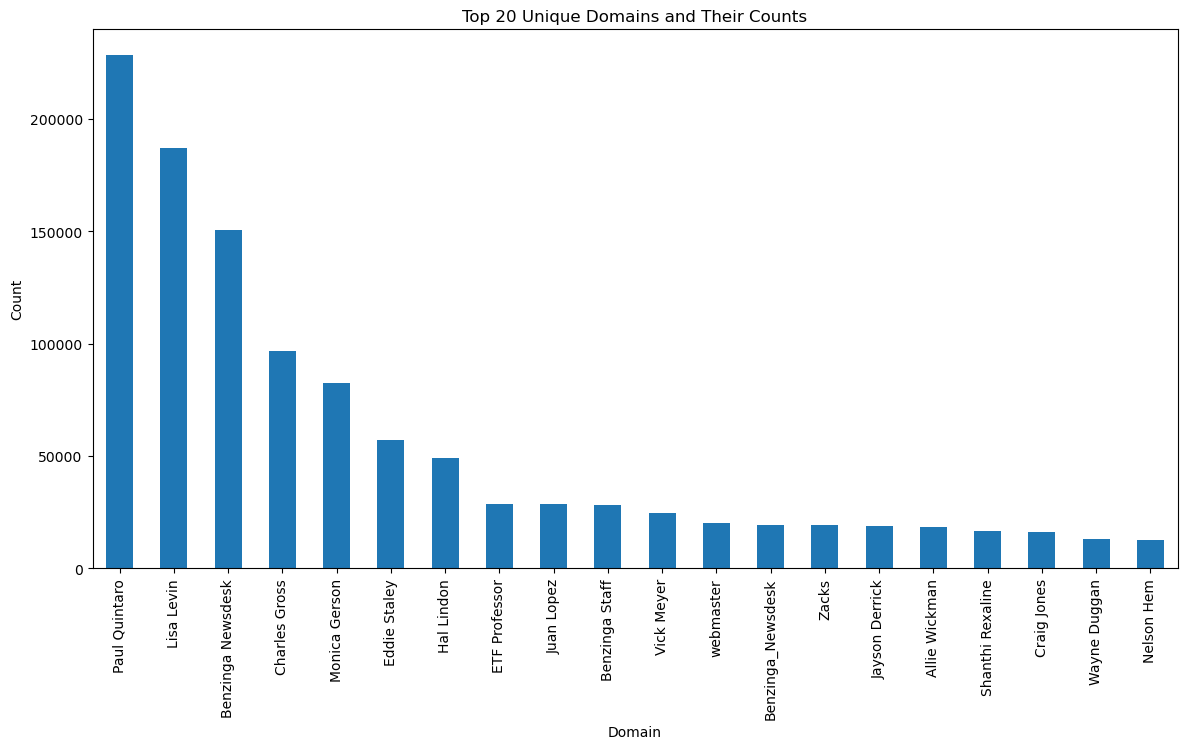

In [16]:
import re

# Extract domain from email addresses in the 'publisher' column
df['publisher_domain'] = df['publisher'].apply(lambda x: re.search("@[\w.]+", x).group() if re.search("@[\w.]+", x) else x)

# Get the unique domains and their counts
domain_counts = df['publisher_domain'].value_counts()

# Print the unique domains and their counts
print("Unique domains and their counts:")
print(domain_counts)

# Plot the top 20 unique domains and their counts for better clarity
top_domain_counts = domain_counts.head(20)

plt.figure(figsize=(14, 7))
top_domain_counts.plot(kind='bar')
plt.xlabel('Domain')
plt.ylabel('Count')
plt.title('Top 20 Unique Domains and Their Counts')
plt.show()


 Conclusion

 Throughout this exploratory data analysis, we have taken several steps to understand the dataset better and derive meaningful insights. 
 Here is a summary of the process we followed:

 1. **Data Loading and Initial Inspection**: We started by loading the dataset and inspecting its structure, including the columns and data types. This helped us understand the basic layout and content of the data.

 2. **Data Cleaning and Preprocessing**: We performed data cleaning tasks such as handling missing values, converting data types, and extracting relevant information from columns. This step ensured that our data was in a suitable format for analysis.

 3. **Descriptive Statistics**: We calculated descriptive statistics for various columns to get an overview of the data distribution. This included measures such as count, mean, standard deviation, minimum, and maximum values.

 4. **Publisher Analysis**: We analyzed the distribution of articles by different publishers. This involved counting the number of articles published by each publisher and identifying the top publishers in the dataset.

 5. **Headline Length Analysis**: We examined the length of headlines and calculated the mean headline length for the top publishers. This helped us understand the variation in headline lengths across different publishers.

 6. **Temporal Analysis**: We analyzed the publication dates to identify trends over time. This included examining the number of articles published on different days of the week and over the years.

 7. **Domain Analysis**: We extracted domains from email addresses used as publisher names to identify unique domains and their contribution to the dataset. This provided insights into the organizations contributing to the dataset.

8. **Visualization**: We created various plots to visualize the data and make the insights more accessible. This included bar plots for publisher counts, headline lengths, and domain counts.

Overall, this exploratory data analysis has provided a comprehensive understanding of the dataset, highlighting key patterns and trends. The insights gained from this analysis can inform further research and decision-making processes.
